# Final Project, Part 2

The purpose of this assignment is to create a 'Viz for Experts' with an interactive dashboard interface for exploring your data.

For this submission option, you will submit your work through this Workspace.
    
**Please see Homework Prompt in PrairieLearn interface for more details on the requirements for this assignment.**

A rough outline of elements of code and write-up is shown below:

## Code:

 * An interactive dashboard within your Workspace that helps an expert explore your dataset thoroughly.
 * There should be a "dashboard" type aspect to this - i.e. a linked view exploring your dataset in an interactive way (like in Lab \#4) with [bqplot](https://bqplot.github.io/bqplot/).
 * Do not delete any cells, *just comment them out*. Show your work.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import scipy

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-d_ck0wz5 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_excel('https://www.eia.gov/dnav/pet/xls/PET_PRI_GND_A_EPM0_PTE_DPGAL_W.xls', sheet_name=4)

In [3]:
df.head()

,Back to Contents,Data 4: Cities,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Sourcekey,EMM_EPM0_PTE_YBOS_DPG,EMM_EPM0_PTE_YORD_DPG,EMM_EPM0_PTE_YCLE_DPG,EMM_EPM0_PTE_YDEN_DPG,EMM_EPM0_PTE_Y44HO_DPG,EMM_EPM0_PTE_Y05LA_DPG,EMM_EPM0_PTE_YMIA_DPG,EMM_EPM0_PTE_Y35NY_DPG,EMM_EPM0_PTE_Y05SF_DPG,EMM_EPM0_PTE_Y48SE_DPG
1,Date,"Weekly Boston, MA All Grades All Formulations ...",Weekly Chicago All Grades All Formulations Ret...,"Weekly Cleveland, OH All Grades All Formulatio...",Weekly Denver All Grades All Formulations Reta...,Weekly Houston All Grades All Formulations Ret...,Weekly Los Angeles All Grades All Formulations...,"Weekly Miami, FL All Grades All Formulations R...",Weekly New York City All Grades All Formulatio...,Weekly San Francisco All Grades All Formulatio...,"Weekly Seattle, WA All Grades All Formulations..."
2,2000-06-05 00:00:00,NaN,1.99,NaN,1.534,1.529,1.591,NaN,1.654,1.805,NaN
3,2000-06-12 00:00:00,NaN,2.134,NaN,1.576,1.557,1.587,NaN,1.693,1.812,NaN
4,2000-06-19 00:00:00,NaN,2.148,NaN,1.65,1.591,1.583,NaN,1.731,1.816,NaN


In [4]:
# sophie: add the correlation matrix, the boxplot, the stacked line chart
# begin cleaning
df = df.drop(0)
df = df.fillna(value=0)
list(df.columns)

['Back to Contents',
 'Data 4: Cities',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10']

In [5]:
df = df.rename(columns={'Back to Contents': 'Date by Week', 
                   'Data 4: Cities': 'Boston', 
                   'Unnamed: 2': 'Chicago',
                  'Unnamed: 3': 'Cleveland',
                  'Unnamed: 4': 'Denver',
                  'Unnamed: 5': 'Houston',
                  'Unnamed: 6': 'Los Angeles',
                  'Unnamed: 7': 'Miami',
                  'Unnamed: 8': 'New York City',
                  'Unnamed: 9': 'San Francisco',
                  'Unnamed: 10': 'Seattle'})
df = df.drop(1)

In [6]:
df[['Boston', 
    'Chicago', 
    'Cleveland', 
    'Denver', 
    'Houston', 
    'Los Angeles', 
    'Miami', 
    'New York City',
   'San Francisco',
   'Seattle']] = df[['Boston', 
    'Chicago', 
    'Cleveland', 
    'Denver', 
    'Houston', 
    'Los Angeles', 
    'Miami', 
    'New York City',
   'San Francisco',
   'Seattle']].apply(pd.to_numeric)
df['Date by Week'] = pd.to_datetime(df['Date by Week'], format='%B %d %Y', infer_datetime_format=True)
df.head()

,Date by Week,Boston,Chicago,Cleveland,Denver,Houston,Los Angeles,Miami,New York City,San Francisco,Seattle
2,2000-06-05,0.0,1.990,0.0,1.534,1.529,1.591,0.0,1.654,1.805,0.0
3,2000-06-12,0.0,2.134,0.0,1.576,1.557,1.587,0.0,1.693,1.812,0.0
4,2000-06-19,0.0,2.148,0.0,1.650,1.591,1.583,0.0,1.731,1.816,0.0
5,2000-06-26,0.0,2.029,0.0,1.686,1.602,1.607,0.0,1.748,1.831,0.0
6,2000-07-03,0.0,1.829,0.0,1.679,1.592,1.648,0.0,1.755,1.883,0.0


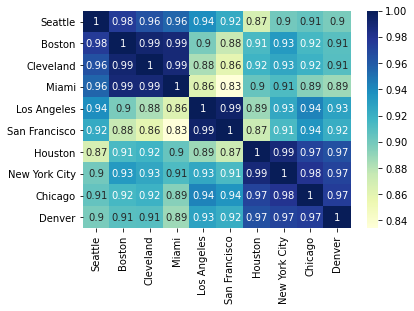

In [7]:
# feedback from presentation was to try and cluster higher correlated things together within the corr. matrix
# ^ this can be done with scipy 'hierarchy' function
# specifically: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# and:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.leaves_list.html#scipy.cluster.hierarchy.leaves_list
df2 = df.drop(['Date by Week'], axis=1)
corr_matrix = df2.corr()

from scipy.cluster import hierarchy
links = hierarchy.linkage(corr_matrix, method='average', metric='correlation') 
ordered_links = hierarchy.leaves_list(links)

reordered_corr_matrix = corr_matrix.iloc[ordered_links, ordered_links]
sns.heatmap(reordered_corr_matrix, cmap='YlGnBu', annot=True)
plt.show()

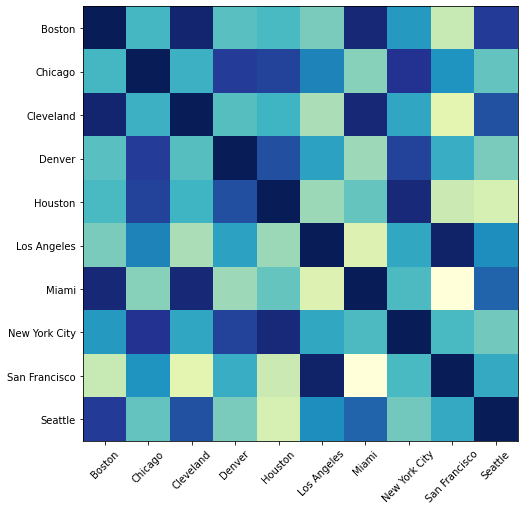

In [8]:
# trying to make a correlation matrix heatmap
# with just matplotlib and numpy because looking ahead, starboard is finicky with importing seaborn
# this isn't as easily able to have us group by color
correlation_matrix = df2.corr()
plt.figure(figsize=(8,8))
plt.imshow(correlation_matrix, cmap='YlGnBu', interpolation='nearest')
plt.colorbar
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.show()

In [9]:
# try to make this interactive with ipywidgets for different colormaps
# had lots of issues with using @ipywidgets method previously used, so we moved the interaction element to the end
def make_corr_matrix(colors):
    plt.figure(figsize=(8,8))
    matrix = plt.imshow(correlation_matrix, cmap=colors, interpolation='nearest')
    plt.colorbar(matrix, label='Correlation Values')
    plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
    plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
    plt.show()
colors_menu = ipywidgets.Dropdown(options=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds'], value = 'Blues')
ipywidgets.interact(make_corr_matrix, colors=colors_menu)

interactive(children=(Dropdown(description='colors', index=2, options=('Greys', 'Purples', 'Blues', 'Greens', …

<function __main__.make_corr_matrix(colors)>

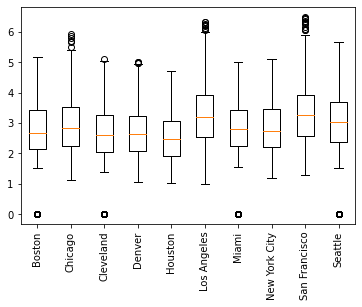

In [10]:
col_list = df2.columns.tolist()
fig, ax = plt.subplots()
figsize = (20, 20)
ax.boxplot(df2)
ax.set_xticks(range(1, len(col_list) + 1))
ax.set_xticklabels(col_list, rotation=90)
plt.show()

In [11]:
# try to get just one boxplot with a dropdown link
columns = list(df2)
@ipywidgets.interact(city = ipywidgets.Dropdown(options=columns, value='Boston'))
def create_boxplot(city):
    fig, ax = plt.subplots()
    figsize = (20, 20)
    ax.boxplot(df2[city])
    ax.set_xticks([1])
    ax.set_xticklabels([city])
    plt.show()

interactive(children=(Dropdown(description='city', options=('Boston', 'Chicago', 'Cleveland', 'Denver', 'Houst…

In [12]:

# how to use select multiple widget as a user: 
# "Multiple values can be selected with shift and/or ctrl (or command) pressed and mouse clicks or arrow keys."
columns_list = list(df2)
def create_boxplots(cities):
    fig, ax = plt.subplots()
    figsize = (10, 10)
    data = [df2[city] for city in cities]
    ax.boxplot(data)
    ax.set_xticks(range(1, len(cities) + 1))
    ax.set_xticklabels(cities, rotation=90)
    ax.set_ylabel('Price')
selected_cities = ipywidgets.SelectMultiple(options=columns_list, value=['Boston', 'Chicago'])
ipywidgets.interact(create_boxplots, cities=selected_cities)


interactive(children=(SelectMultiple(description='cities', index=(0, 1), options=('Boston', 'Chicago', 'Clevel…

<function __main__.create_boxplots(cities)>

In [13]:
def create_stacked_lineplot(cities):
    fig, ax = plt.subplots()
    figsize = (10, 10)
    for city in cities:
        plt.plot(df['Date by Week'], df[city], label=city)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
selected_cities = ipywidgets.SelectMultiple(options=columns_list, value=['Boston', 'Houston'])
ipywidgets.interact(create_stacked_lineplot, cities=selected_cities)


interactive(children=(SelectMultiple(description='cities', index=(0, 4), options=('Boston', 'Chicago', 'Clevel…

<function __main__.create_stacked_lineplot(cities)>

In [14]:
# try to get both stacked lineplot and boxplot next to each other and manipulated by same widget
# based on our previous code above ^ but manipulated by axis number 

#constants
df2 = df.drop(['Date by Week'], axis=1)
columns_list = list(df2)

def create_both_plots(cities):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
    boxplot_data = [df2[city] for city in cities]
    axes[0].boxplot(boxplot_data)
    axes[0].set_xticks(range(1, len(cities) + 1))
    axes[0].set_xticklabels(cities, rotation=45)
    axes[0].set_ylabel('Price ($)')
    for city in cities:
        axes[1].plot(df['Date by Week'], df[city], label=city)
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price ($)')
    axes[1].legend()
    plt.show()
selection = ipywidgets.SelectMultiple(options=columns_list, value=['Chicago', 'San Francisco'])
ipywidgets.interact(create_both_plots, cities=selection)


interactive(children=(SelectMultiple(description='cities', index=(1, 8), options=('Boston', 'Chicago', 'Clevel…

<function __main__.create_both_plots(cities)>

Final Interactive Visualizations Code

In [15]:
def make_corr_matrix(colors):
    plt.figure(figsize=(8,8))
    matrix = plt.imshow(correlation_matrix, cmap=colors, interpolation='nearest')
    plt.colorbar(matrix, label='Correlation Values')
    plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
    plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
    plt.show()
colors_menu = ipywidgets.Dropdown(options=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds'], value = 'Blues')
ipywidgets.interact(make_corr_matrix, colors=colors_menu)

interactive(children=(Dropdown(description='colors', index=2, options=('Greys', 'Purples', 'Blues', 'Greens', …

<function __main__.make_corr_matrix(colors)>

In [16]:
df2 = df.drop(['Date by Week'], axis=1)
columns_list = list(df2)

def create_both_plots(cities):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
    boxplot_data = [df2[city] for city in cities]
    axes[0].boxplot(boxplot_data)
    axes[0].set_xticks(range(1, len(cities) + 1))
    axes[0].set_xticklabels(cities, rotation=45)
    axes[0].set_ylabel('Price ($)')
    for city in cities:
        axes[1].plot(df['Date by Week'], df[city], label=city)
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price ($)')
    axes[1].legend()
    plt.show()
selection = ipywidgets.SelectMultiple(options=columns_list, value=['Chicago', 'San Francisco'])
ipywidgets.interact(create_both_plots, cities=selection)


interactive(children=(SelectMultiple(description='cities', index=(1, 8), options=('Boston', 'Chicago', 'Clevel…

<function __main__.create_both_plots(cities)>

## Prose:

* One paragraph explaining how to use the dashboard you created, to help someone who is not an expert understand your dataset.
* A list of 1 or more contextual datasets you have identified, links to where they reside, and a sentence about why they might be useful in telling the final story.
  * by "contextual dataset" here means a dataset that would add context to your chosen dataset. For example, if your dataset is the Champaign bus routes, some interesting contextual datasets could be the Chicago bus routes, or the Springfield bus routes, or the Amtrak routes in Champaign
  * you do not have to do anything with this dataset at the moment beyond writing a bit about why it would be useful. Looking forward, you will want to include "contextual visualizations" (which you may or may not generate on your own) in your Final Project, Part 3 and identifying a possibly useful dataset is a great way to start looking for contextual visualizations.
* If you have identified your dataset as a "large one" (i.e. larger than the GitHub file upload limit) comment on if you want to revise your plan for hosting this data or not. If this does not apply to your dataset please explicitly state this.
* Additionally, please note that as of writing, it is not possible to embed images within Starboard. Be sure to address how you plan on including your contextual dataset to add context to your main dataset given that you won't be able to directly embed images if you plan on using Starboard for Part 3.1 of the Final Project.


For our first interactive visualization, we created a correlation matrix heat map to identify quantifiable relationships across each city and the varying strengths city-to-city relationships have. All the cities in the dataset (Boston, Chicago, Cleveland, Denver, Houston, Los Angeles, Miami, New York City, San Francisco, and Seattle) are listed on the X and Y axes, and each city is compared to all the other cities. With this visualization, we can identify cities with the strongest and weakest relationships based on how high or low the correlation values are on the right side using the 'Correlation Values' legend. The lighter the color of each box, the weaker the relationship between the two cities and the darker the color is for each box, the stronger the relationship is between the two cities. Users get the option to select a sequential colormap to visualize the relationships based on personal preferences and to accommodate for the fact that we wanted our light-to-dark scale to be very uniform, which meant choosing color palettes based on a gradient rather than color palettes that used multiple colors. The final two graphs that are listed side by side beneath the correlation matrix graph was created to visualize more detail-oriented insights on a city-by-city basis. Users get the option to select a city (or multiple cities) of their choice and view a box plot on the left which illustrates the upper and lower quartiles, and the median for gas prices on a dollars per gallon level. The points sometimes above and below the boxes are outliers. The stacked line graph on the right visualizes the trends of the dollars per gallon cost for the selected city over time from 2000 to present day. Users can go city-by-city and compare and contrast the rates over time using these two interactive visualizations while getting a more detail-oriented analysis of the city's trends in comparison to the others. 

Our contextual datasets go back to how initially as a team we each analyzed different grades before locking in on the "all grades" dataset. Other grades we explored included: 
- regular: https://www.eia.gov/dnav/pet/pet_pri_gnd_a_epmr_pte_dpgal_w.htm
- premium: https://www.eia.gov/dnav/pet/pet_pri_gnd_a_epmp_pte_dpgal_w.htm
- diesel: https://www.eia.gov/dnav/pet/pet_pri_gnd_a_epd2d_pte_dpgal_w.htm
- midgrade: https://www.eia.gov/dnav/pet/pet_pri_gnd_a_epmm_pte_dpgal_w.htm

We were interested in seeing if different grades of gas showed significant disparities. By obtaining insight from these datasets, we were hoping to analyze a wider variety of data and see how all grades may have a more or less significant impact on the dollars per gallon trends over time in comparison to the other grades. Through our interactive plots above, we hope to provide data-driven insights on a high and low level to any audience type while empowering users with the navigating ability to filter out specific inputs to view the trends to any questions they may have regarding the dataset selected.

## Plot Summary

Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc.

For our dataset, we selected a dataset from the US Energy Information Administration which consists of US Gas Prices for all grades of gas across major US cities. The types of data include the date with data starting from June 5, 2000 to present day and weekly gasoline prices for all grades all formulations retail in dollars per gallon for Boston, Chicago, Cleveland, Denver, Houston, Los Angeles, Miami, New York City, San Francisco, and Seattle. All of the data in this dataset are quantitative, numeric values where the rows represent the date on a weekly basis and the columns represent the values in gasoline prices in dollars per gallon. Originally, each member of our team analyzed a different grade but after doing some initial data analysis work, we came to the conclusion that it was best for us to isolate and delve into the "all grades" dataset that identified weekly data from 2000-present day across major US cities.